## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

Text(0.5, 1.0, 'Distribution of Purchase Amount (USD) for different Subscription Status')

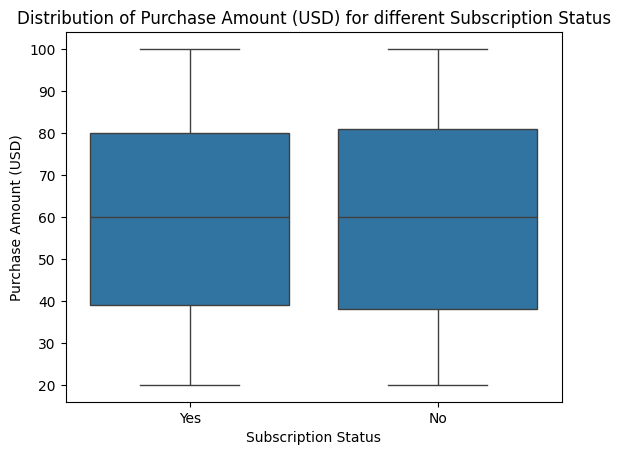

In [3]:
sns.boxplot(x="Subscription Status", y="Purchase Amount (USD)", data=df)
plt.title("Distribution of Purchase Amount (USD) for different Subscription Status")

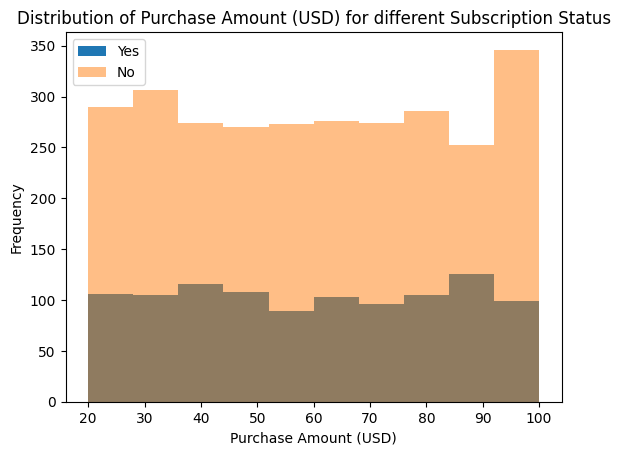

In [4]:
plt.hist(df.loc[df["Subscription Status"] == "Yes", "Purchase Amount (USD)"], label="Yes")
plt.hist(df.loc[df["Subscription Status"] == "No", "Purchase Amount (USD)"], label="No", alpha=0.5)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Purchase Amount (USD) for different Subscription Status")
plt.legend()

## Insights of Question #1:


*   From **`Boxplot`**: The Median of Pusrchase Amount (USD) for both subscription status is same, which is approximately equal to $60.00
*   From **`Histogram`**: People without a subscription purchased more than twice as much as those with a subscription



### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

Text(0.5, 1.0, 'Frequency of Different Payment Methods')

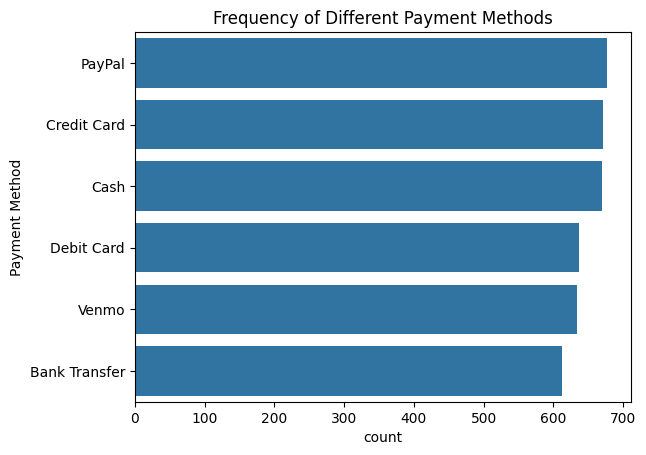

In [5]:
order_desc = df['Payment Method'].value_counts().index
sns.countplot(df["Payment Method"], order=order_desc)
plt.title("Frequency of Different Payment Methods")


In [6]:
cats = df["Payment Method"].value_counts().index
vals = df["Payment Method"].value_counts().values

Text(0.5, 1.0, 'Frequency of Different Payment Methods')

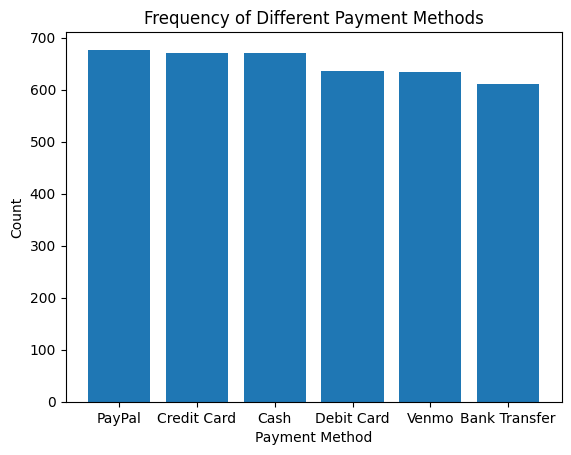

In [7]:
plt.bar(cats, vals)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Frequency of Different Payment Methods")

## Insights of Question #2


*   Payment method usage is relatively evenly distributed, though PayPal has the highest frequency and bank transfer the lowest



### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

Text(0.5, 1.0, 'Number of Purchases by Gender and Season')

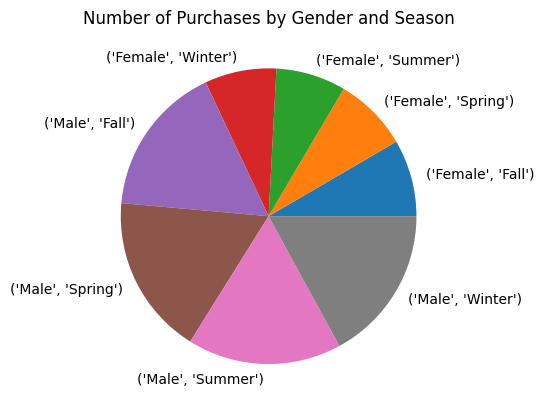

In [12]:
gender_season = df.groupby(["Gender", "Season"])["Customer ID"].count()
plt.pie(gender_season, labels=gender_season.index)
plt.title("Number of Purchases by Gender and Season")

<Axes: xlabel='Gender,Season'>

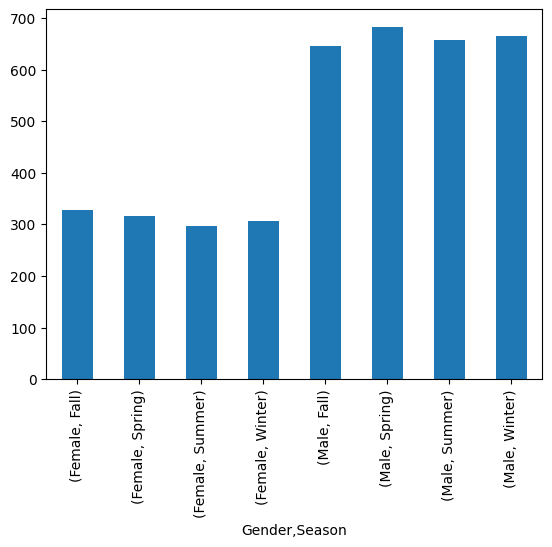

In [13]:
gender_season.plot(kind="bar")

Text(0, 0.5, 'Count')

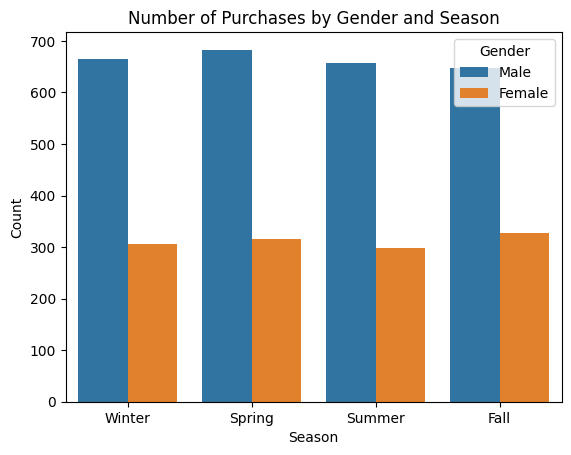

In [15]:
sns.countplot(data=df, x="Season", hue="Gender")
plt.title("Number of Purchases by Gender and Season")
plt.xlabel("Season")
plt.ylabel("Count")

## Insights of Question #3

*   Across all seasons, male purchase volume is over twice that of females
*   Male purchases are relatively evenly distributed across seasons, though spring records the highest volume and summer the lowest

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

Text(0.5, 1.0, 'Correlation Heatmap')

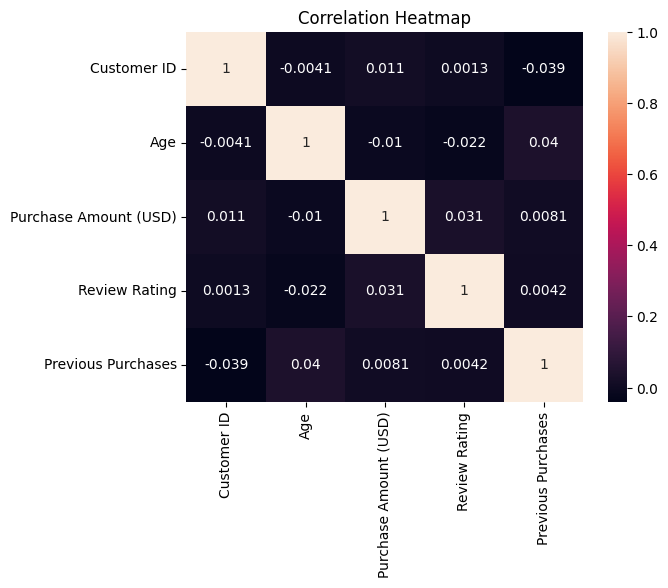

In [16]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")

## Insights of Question #4

* There is no any correlations between the features (No Multicollinearity)

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

<Axes: xlabel='Age', ylabel='Purchase Amount (USD)'>

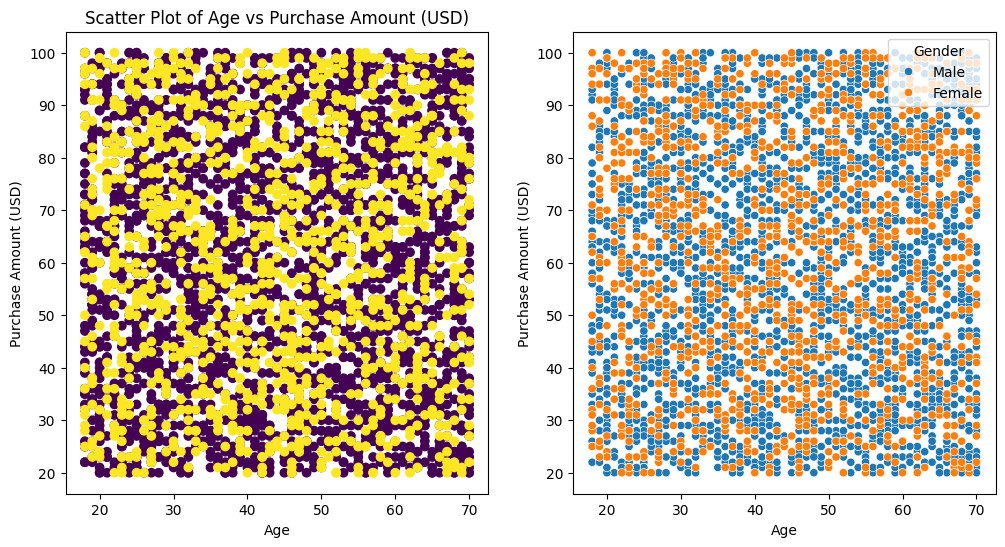

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df["Age"], df["Purchase Amount (USD)"], c=df["Gender"].map({"Male": 0, "Female": 1}))
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Scatter Plot of Age vs Purchase Amount (USD)")
plt.subplot(1, 2, 2)
sns.scatterplot(x="Age", y="Purchase Amount (USD)", hue="Gender", data=df)

## Insights:
* No relationship exists between age and purchase amount for either gender


Text(0.5, 1.0, 'Scatter Plot of Age vs Purchase Amount (USD)')

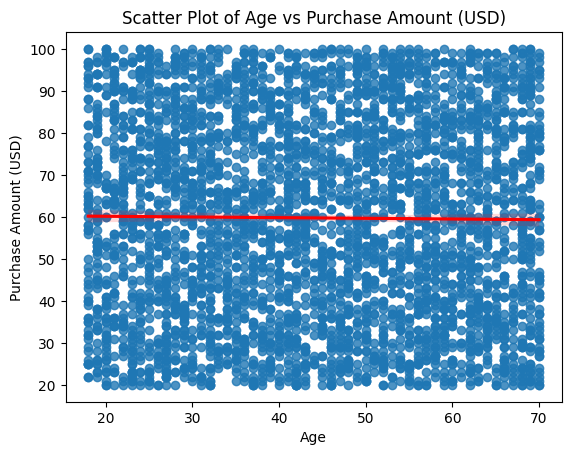

In [23]:
sns.regplot(x="Age", y="Purchase Amount (USD)", data=df, line_kws={"color":"red"})
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Scatter Plot of Age vs Purchase Amount (USD)")

## Insights of Question #5

* There is no observable relationship between age and purchase amount, as the trend line stays close to the median purchase amount

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

Text(0.5, 1.0, 'Average Review Rating by Category and Size')

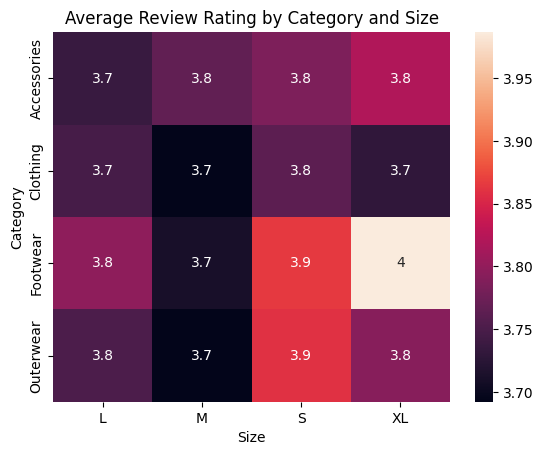

In [25]:
cat_sz = pd.pivot_table(df, values="Review Rating", index="Category", columns="Size")
sns.heatmap(cat_sz, annot=True)
plt.title("Average Review Rating by Category and Size")

## Insights of Question #6

* Across all categories, S and XL sizes have higher average rates
* The highest average rate goes to Footwear category with size XL

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

Text(0.5, 1.0, 'Average Purchase Amount by Season and Shipping Type')

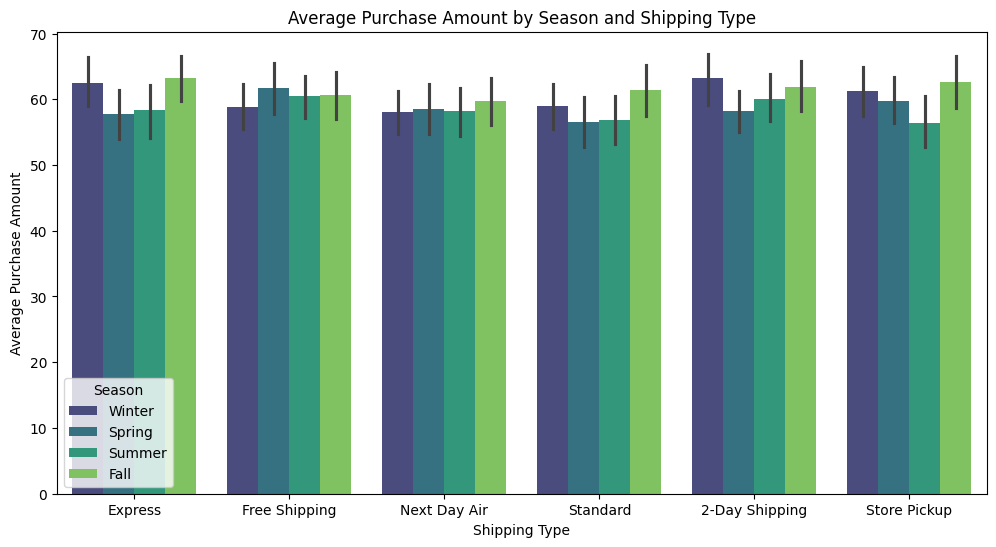

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Shipping Type", y="Purchase Amount (USD)", hue="Season", palette="viridis")
plt.xlabel("Shipping Type")
plt.ylabel("Average Purchase Amount")
plt.title("Average Purchase Amount by Season and Shipping Type")

Text(0.5, 1.0, 'Average Purchase Amount by Season and Shipping Type')

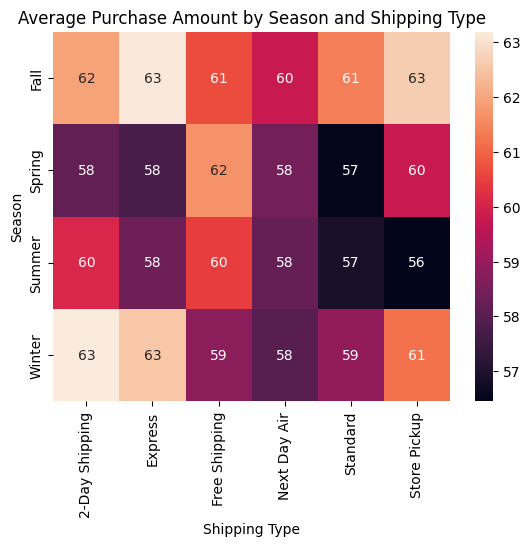

In [35]:
sns.heatmap(pd.pivot_table(df, values="Purchase Amount (USD)", index="Season", columns="Shipping Type"), annot=True)
plt.title("Average Purchase Amount by Season and Shipping Type")

## Insights of Question #7
* The Highest Average Purchase Amount in Fall was using (Express, Store Pickup) shipping types, and in Winter was using (2-Day Shipping, Express) shipping types.


### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

Text(0.5, 1.0, 'Review Rating by Gender and Subscription Status')

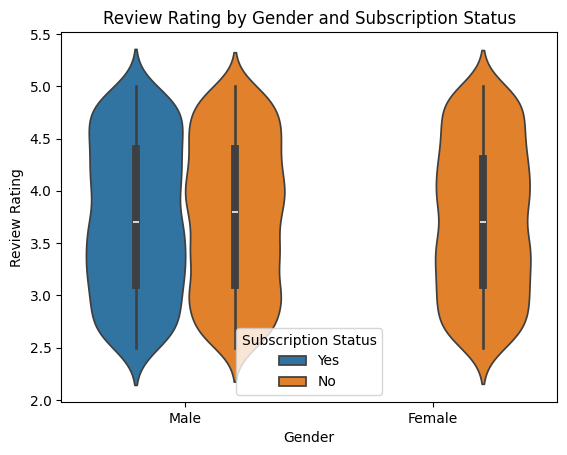

In [36]:
sns.violinplot(data=df, x="Gender", y="Review Rating", hue="Subscription Status")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.title("Review Rating by Gender and Subscription Status")

## Insights of Question #8
* Both males and females have review ratings spread roughly between 2.5 and 5, with no extreme outliers
* Subscription Status Doesn’t Strongly Affect Ratings
* The median review rating is around 3.7–3.8 for all groups (male/female, subscribed/not subscribed)

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

Text(0.5, 1.0, 'Top 5 Most Purchased Items by Total Purchase Amount')

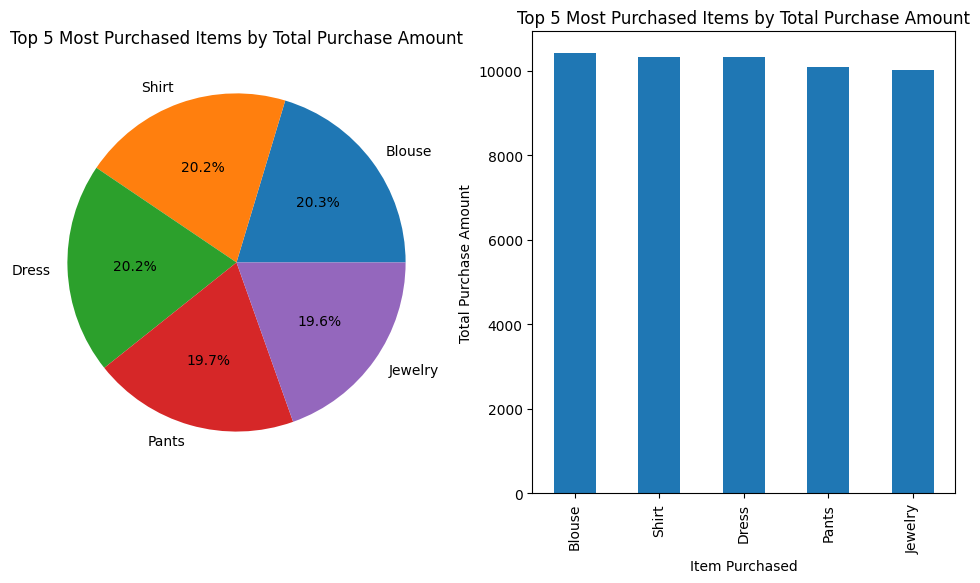

In [43]:
dff = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending=False)
top5 = dff.head(5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(top5, labels=top5.index, autopct='%1.1f%%')
plt.title("Top 5 Most Purchased Items by Total Purchase Amount")

plt.subplot(1, 2, 2)
top5.plot(kind="bar")
plt.xlabel("Item Purchased")
plt.ylabel("Total Purchase Amount")
plt.title("Top 5 Most Purchased Items by Total Purchase Amount")

## Insights of Question #9
* 80% from top 5 most purchased Item Purchased by total Purchase Amount are from Clothing category

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

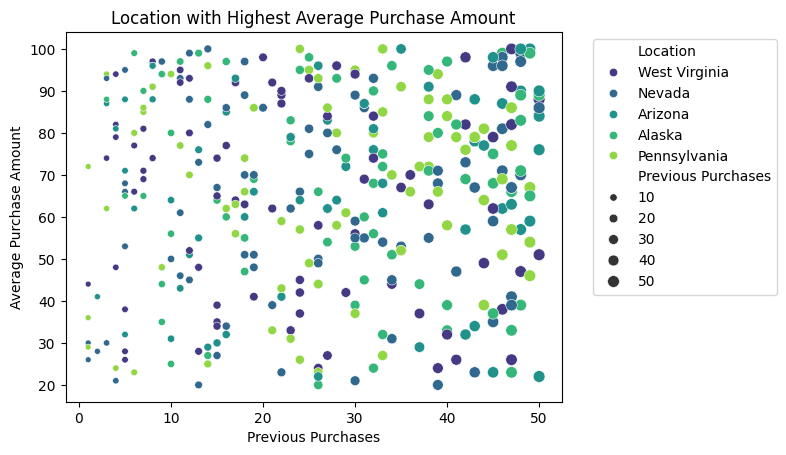

In [58]:
dff = df.groupby("Location")["Purchase Amount (USD)"].mean().sort_values(ascending=False)
top5 = dff.head(5)
sns.scatterplot(data=df[df["Location"].isin(top5.index)], x="Previous Purchases", y="Purchase Amount (USD)", size="Previous Purchases",hue ="Location", palette="viridis")
plt.xlabel("Previous Purchases")
plt.ylabel("Average Purchase Amount")
plt.title("Location with Highest Average Purchase Amount")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [60]:
top5

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310


### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

Text(50.722222222222214, 0.5, 'Gender')

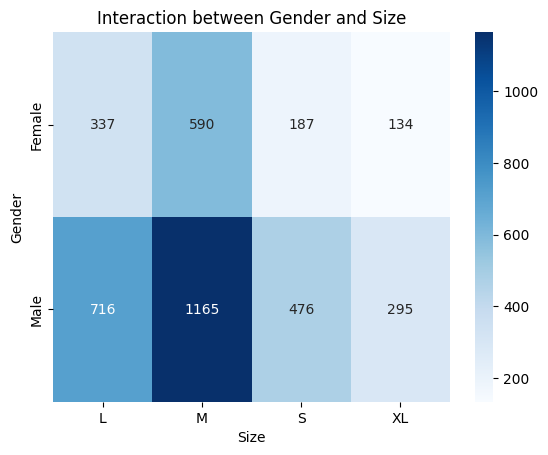

In [62]:
gender_size = pd.crosstab(df["Gender"], df["Size"])
sns.heatmap(gender_size, annot=True, fmt='d', cmap='Blues')
plt.title("Interaction between Gender and Size")
plt.xlabel("Size")
plt.ylabel("Gender")

## Insights of Question #11
* For each size category, the number of males is more than twice that of females

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

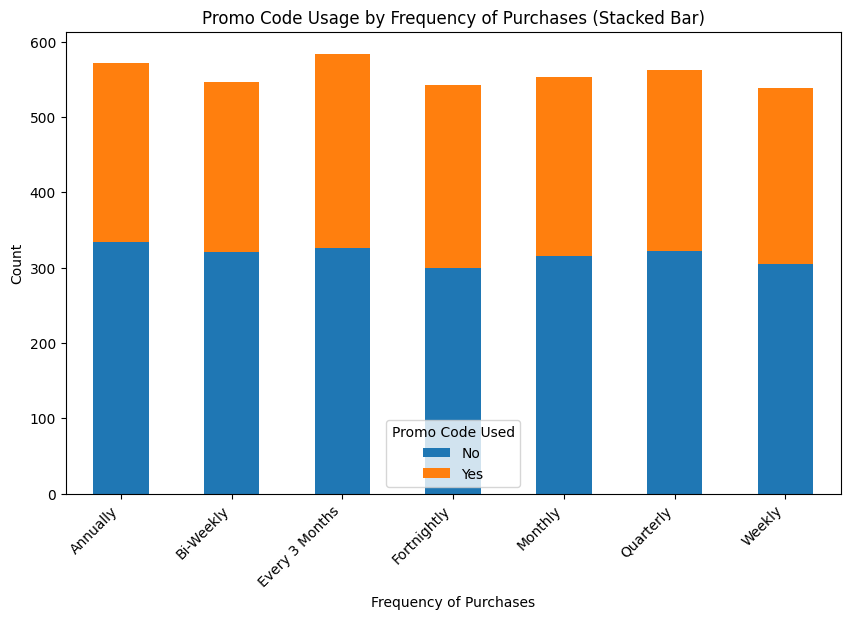

In [75]:
promo_frequency = df.groupby(["Frequency of Purchases", "Promo Code Used"]).size().unstack(fill_value=0)

promo_frequency.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Promo Code Usage by Frequency of Purchases (Stacked Bar)")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Promo Code Used")

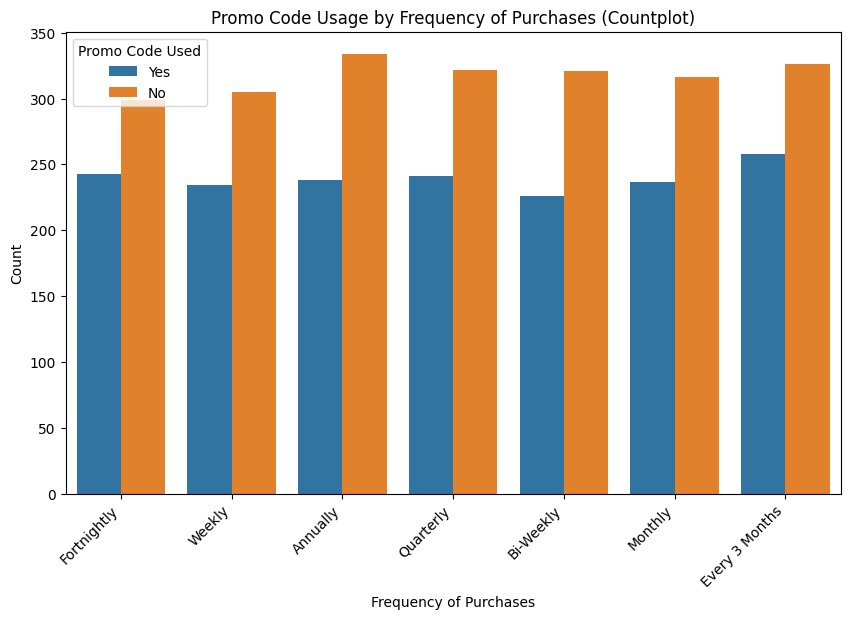

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Frequency of Purchases", hue="Promo Code Used")
plt.title("Promo Code Usage by Frequency of Purchases (Countplot)")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Promo Code Used")

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

Text(0.5, 0.98, 'Pairwise Relationships between Numeric Columns Segmented by Gender')

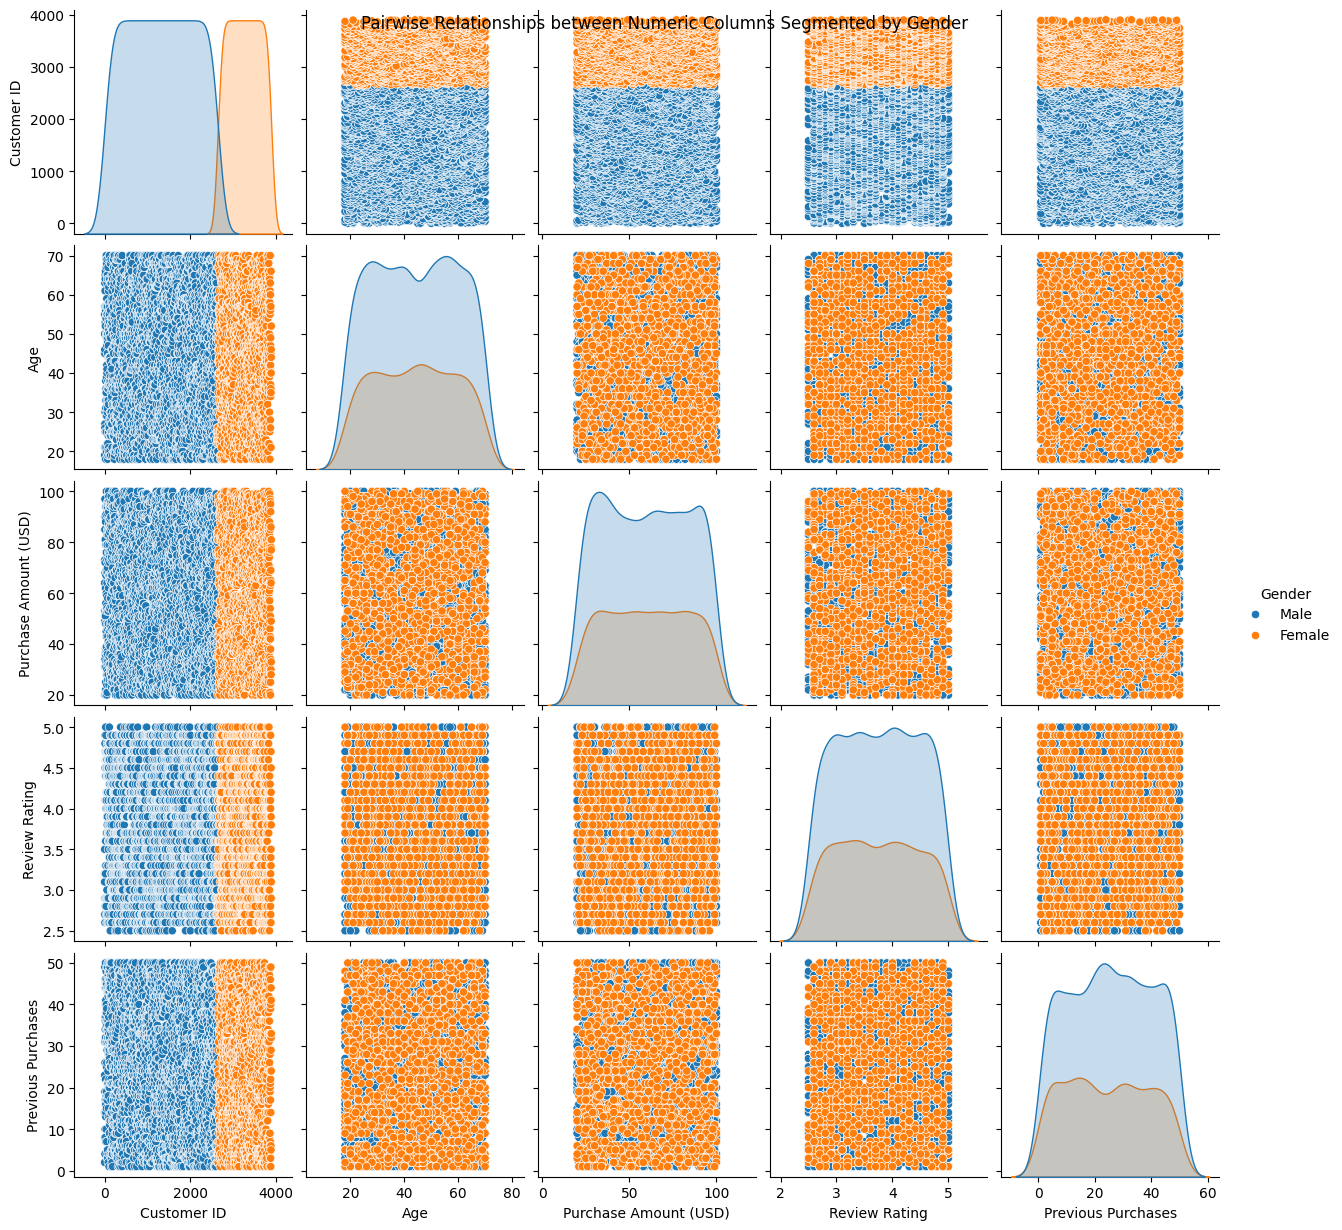

In [74]:
sns.pairplot(df, hue="Gender")
plt.suptitle("Pairwise Relationships between Numeric Columns Segmented by Gender")